In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Importing and reading dataset
df = pd.read_csv("new_heart_disease_cleaned.csv")
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,494,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,495,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,496,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,497,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [4]:
# Remove unnamed column

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


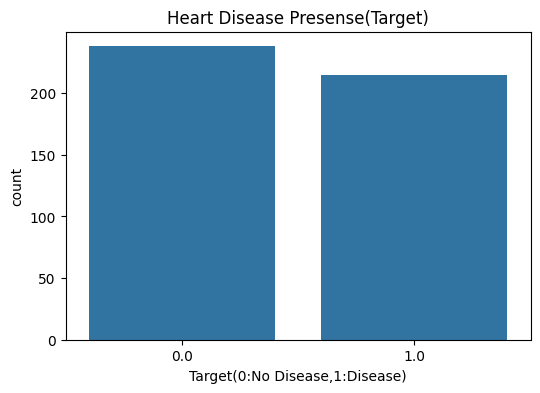

In [5]:
#Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df)
plt.title("Heart Disease Presense(Target)")
plt.xlabel('Target(0:No Disease,1:Disease)')
plt.ylabel('count')
plt.show()

In [ ]:
Interpretetion : Class 0 has more patients than class 1,but the distribution is ralatively balanced.

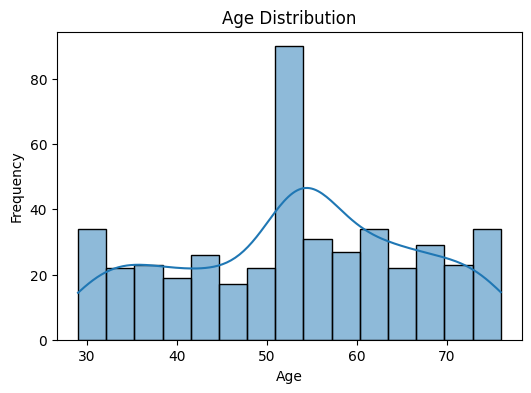

In [7]:
#Age Distribution 
plt.figure(figsize=(6,4))  # Sets the size of the plot 
sns.histplot(df['age'], kde=True, bins=15) # Plots a histogram with a KDE curve for the 'age' column
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Interpretetion : Most patients are aged 45-60. Age is slightly right-skewed.

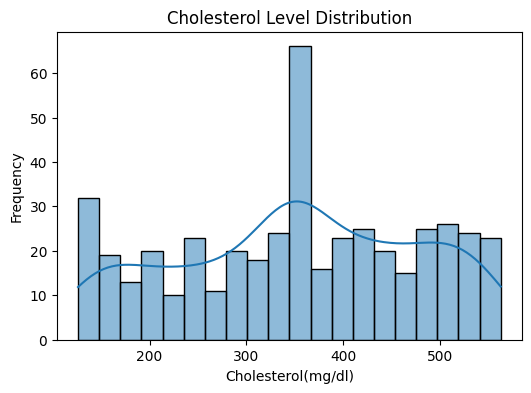

In [8]:
#Cholesterol Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['chol'], kde=True, bins=20)# Plot histogram + KDE for 'chol' column
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol(mg/dl)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Interpretation : Most patients have a cholesterol level around 350 mg/dL, as shown by the highest bar in the histogram.
Cholesterol levels are unevenly distributed across patients, with values ranging widely from 120 to 550 mg/dL.

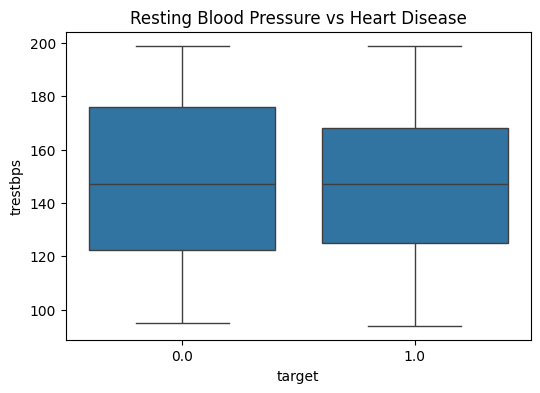

In [9]:
# Resting Blood Pressure (trestbps)

plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.show()

In [ ]:
Interpretation: Patients with heart disease (target=1) show slightly higher blood pressure, but overlap is significant.


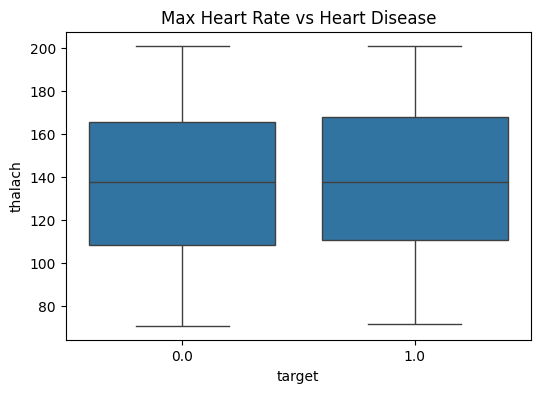

In [10]:
# Maximum Heart Rate (thalach)

plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

In [ ]:
Interpretation : Higher heart rates (thalach) are observed more in heart disease cases.


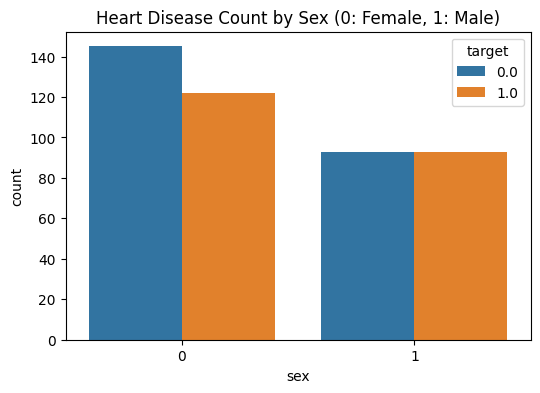

In [11]:
# Count Plot for Sex

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, hue='target')
plt.title('Heart Disease Count by Sex (0: Female, 1: Male)')
plt.show()

In [ ]:
Interpretation:

Females (sex = 0) have a higher overall count, and more females do not have heart disease (target = 0).

Males (sex = 1) show nearly equal counts of those with and without heart disease.

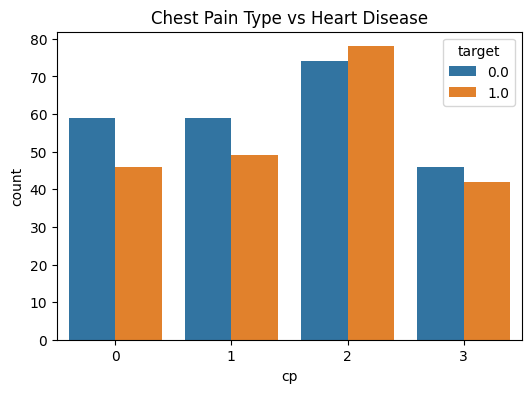

In [12]:
# Count Plot for Chest Pain Type (cp)

plt.figure(figsize=(6, 4))
sns.countplot(x='cp', data=df, hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

In [ ]:
Interpretation: Type 2 chest pain (asymptomatic) is most strongly associated with heart disease.

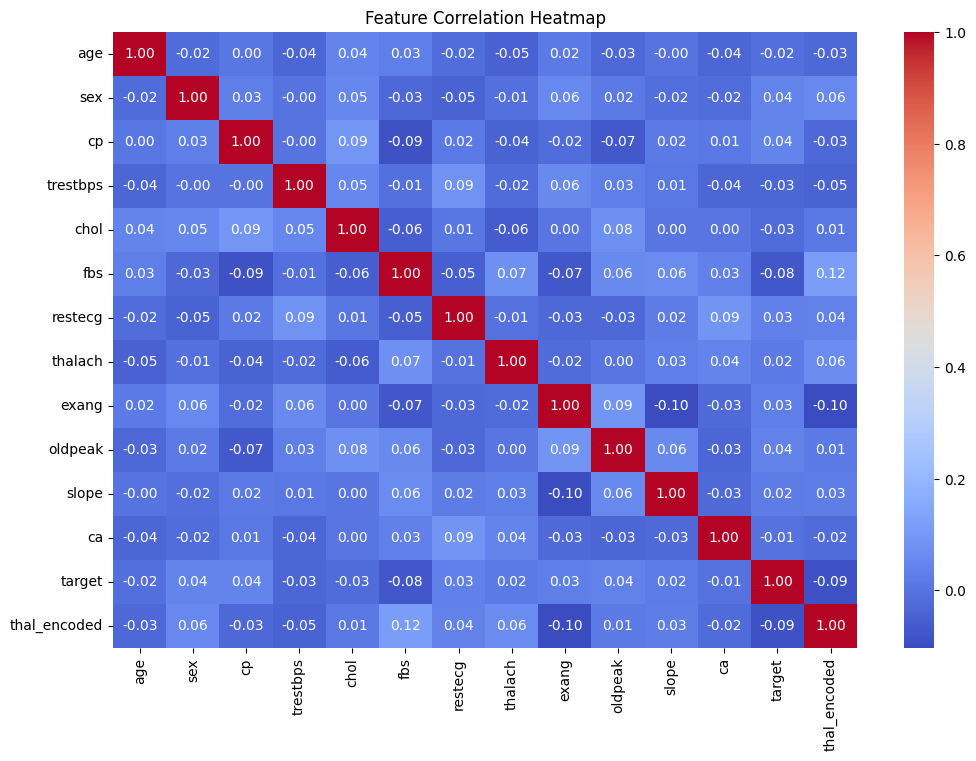

In [13]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")#annot=True: Shows the actual correlation values inside each cell.and fmt=".2f": Formats the numbers to 2 decimal places.
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
Interpretation: 'cp', 'thalach', and 'slope' have positive correlation with heart disease.
'exang', 'oldpeak', and 'ca' are negatively correlated.